In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

In [29]:
with open("adult_names.txt") as r:
    print(r.read())

| This data was extracted from the census bureau database found at
| http://www.census.gov/ftp/pub/DES/www/welcome.html
| Donor: Ronny Kohavi and Barry Becker,
|        Data Mining and Visualization
|        Silicon Graphics.
|        e-mail: ronnyk@sgi.com for questions.
| Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
| 48842 instances, mix of continuous and discrete    (train=32561, test=16281)
| 45222 if instances with unknown values are removed (train=30162, test=15060)
| Duplicate or conflicting instances : 6
| Class probabilities for adult.all file
| Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
| Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)
|
| Extraction was done by Barry Becker from the 1994 Census database.  A set of
|   reasonably clean records was extracted using the following conditions:
|   ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
|
| Prediction task is to determine whether a person makes over

In [30]:
columns = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex",
           "capital_gain","capital_loss","hours_per_week","native_country","income"]
adult = pd.read_csv("adult_data.csv",names=columns)

In [31]:
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [32]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25776 entries, 0 to 25775
Data columns (total 15 columns):
age               25776 non-null int64
workclass         25776 non-null object
fnlwgt            25776 non-null int64
education         25775 non-null object
education-num     25775 non-null float64
marital-status    25775 non-null object
occupation        25775 non-null object
relationship      25775 non-null object
race              25775 non-null object
sex               25775 non-null object
capital_gain      25775 non-null float64
capital_loss      25775 non-null float64
hours_per_week    25775 non-null float64
native_country    25775 non-null object
income            25775 non-null object
dtypes: float64(4), int64(2), object(9)
memory usage: 2.9+ MB


- 8 categorical data
- 5 continious data
- 2 categorical target data
- 1 missing entry

In [33]:
adult.describe()

,age,fnlwgt,education-num,capital_gain,capital_loss,hours_per_week
count,25776.000000,2.577600e+04,25775.000000,25775.000000,25775.000000,25775.000000
mean,38.603468,1.896417e+05,10.079651,1092.618041,86.597517,40.405703
std,13.679340,1.051889e+05,2.560720,7492.054002,401.413989,12.297420
min,17.000000,2.300000e+01,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.179630e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783105e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.368040e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [34]:
print(adult[adult["capital_gain"] == 0]["age"].count())
print(adult[adult["capital_loss"] == 0]["age"].count())

23623
24582


- Most of the capital_gain and capital_loss data is 0 and probably because they are not recorded.

In [35]:
adult.dropna(inplace=True)

In [36]:
categorical = ["workclass","education","marital-status","occupation","relationship","race","sex",
           "native_country","income"]
numerical = ["age","fnlwgt","education-num", "capital_gain","capital_loss","hours_per_week"]

In [37]:
for each in categorical:
    adult[each] = adult[each].apply(lambda x: x.strip())

In [38]:
for each in categorical:
    print(adult[each].value_counts(),"\n",each, "unique type: ",adult[each].nunique())
    print()

Private             17931
Self-emp-not-inc     2026
Local-gov            1683
?                    1443
State-gov            1025
Self-emp-inc          887
Federal-gov           765
Without-pay            10
Never-worked            5
Name: workclass, dtype: int64 
 workclass unique type:  9

HS-grad         8352
Some-college    5771
Bachelors       4261
Masters         1341
Assoc-voc       1090
11th             933
Assoc-acdm       837
10th             753
7th-8th          508
Prof-school      444
9th              411
12th             334
Doctorate        326
5th-6th          252
1st-4th          122
Preschool         40
Name: education, dtype: int64 
 education unique type:  16

Married-civ-spouse       11792
Never-married             8472
Divorced                  3546
Separated                  816
Widowed                    792
Married-spouse-absent      339
Married-AF-spouse           18
Name: marital-status, dtype: int64 
 marital-status unique type:  7

Prof-specialty       3288

- workclass has 9 unique type 1443 missing entry.
- education has 16 unique type 0 missing entry
- marial-status has 7 unique type 0 missing entry
- occupation has 15 unique type 1448 missing entry.
- relationship has 6 unique type and 0 missing entry.
- race has 5 unique type 0 missing entry
- sex has 2 unique type and 0 missing entry
- native country has 42 unique type and 463 missing. USA is almost %85 of the data

- %5 of the workclass data is missing.Private workclass is almost %70 of the data


(array([0, 1]), <a list of 2 Text xticklabel objects>)

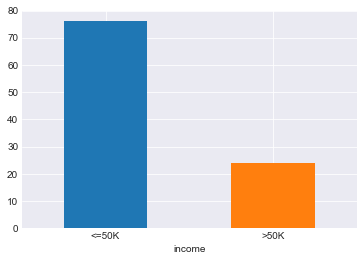

In [39]:
((adult.groupby("income")["age"].count()*100/adult["age"].count())).sort_values(ascending=False).plot(kind="bar");
plt.xticks(rotation="horizontal")

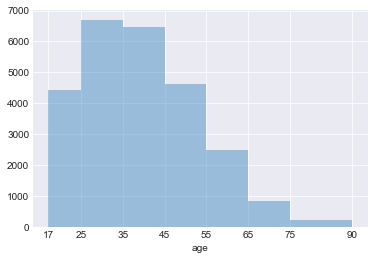

In [40]:
sns.distplot(adult["age"],bins=[17,25,35,45,55,65,75,90],kde=False)
plt.xticks([17,25,35,45,55,65,75,90]);

In [41]:
def age_dist(age):
    #18-35 36-55  55+
    if 17 <= age <= 35:
        return "Young Adult"
    elif 36 <= age <= 55:
        return "Middle-aged Adult"
    else:
        return "Old"

In [42]:
adult["age_class"] = adult["age"].apply(age_dist)

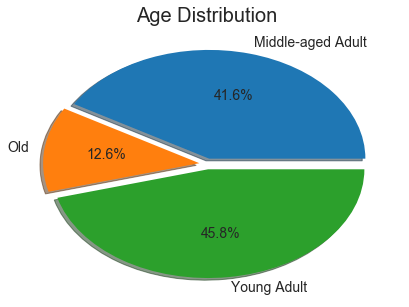

In [43]:
plt.figure(figsize=(7,5));
plt.pie(adult.groupby("age_class").count()["age"]*100/adult["age"].count(), labels=adult.groupby("age_class").count()["age"].index,
    autopct='%1.1f%%', shadow=True,explode=(0.05,0.05,0.05), textprops={'fontsize': 14})
plt.title("Age Distribution",size=20);

workclass
Private             69.567410
Self-emp-not-inc     7.860330
Local-gov            6.529583
?                    5.598448
State-gov            3.976722
Self-emp-inc         3.441319
Federal-gov          2.967992
Without-pay          0.038797
Never-worked         0.019399
Name: age, dtype: float64


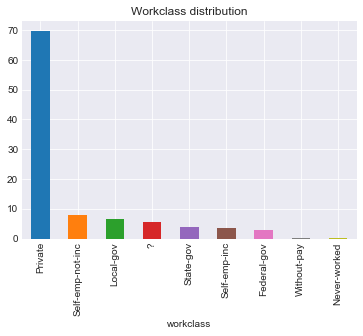

In [44]:
print((adult.groupby("workclass")["age"].count()*100/adult["age"].count()).sort_values(ascending=False))
((adult.groupby("workclass")["age"].count()*100/adult["age"].count())).sort_values(ascending=False).plot(kind="bar");
plt.title("Workclass distribution");

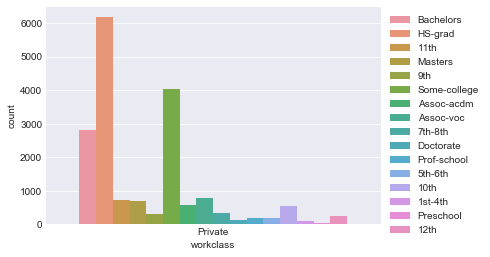

In [45]:
sns.countplot(adult[adult["workclass"] == "Private"]["workclass"],hue=adult["education"])
plt.legend(bbox_to_anchor=(1,1))

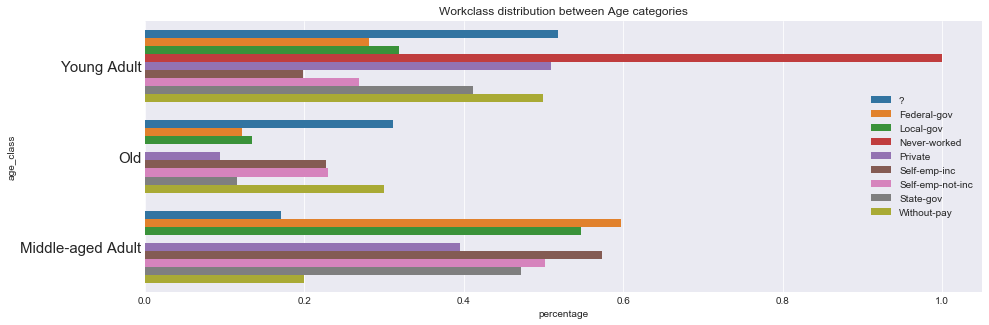

In [46]:
prop_df = (adult
           .groupby("workclass")["age_class"]
           .value_counts(normalize=True)
           .rename("percentage")
           .reset_index())
plt.figure(figsize=(15,5));
plt.title("Workclass distribution between Age categories")
sns.barplot(y="age_class", x="percentage", hue="workclass", data=prop_df,);
plt.yticks(fontsize=15);
plt.legend(loc=5, bbox_to_anchor=(1,1/2));

- Almost %40 percent of the population have graduated either from highschool or some college
- All of the neverworked population are from young adults
- Most unknown cases for workclass from young adults
- Most of midde-aged adults work for federal goverment and local goverment
- Young adults work for private companies or without-pay.


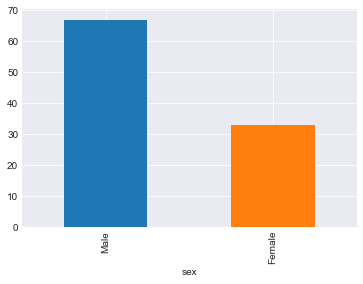

In [47]:
((adult.groupby("sex")["age"].count()*100/adult["age"].count())).sort_values(ascending=False).plot(kind="bar");

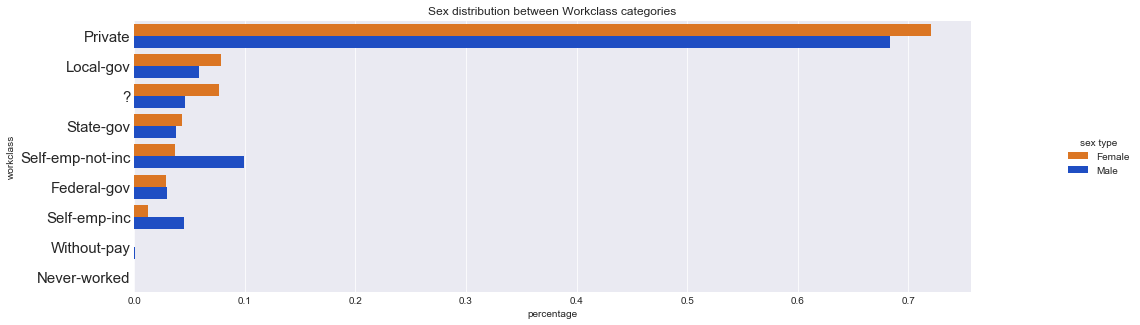

In [48]:
prop_df = (adult
           .groupby("sex")["workclass"]
           .value_counts(normalize=True)
           .rename("percentage")
           .reset_index())
plt.figure(figsize=(15,5));
plt.title("Sex distribution between Workclass categories")
sns.barplot(y="workclass", x="percentage", hue="sex", data=prop_df, palette=sns.xkcd_palette(["orange","blue"]));
plt.yticks(fontsize=15);
plt.legend(loc=5, bbox_to_anchor=(12/10,1/2), title="sex type");

- Nearly %70 of the population are male.
- for both sex almost %70 of the population work for private companies
- Second choice of females is local-gov on the other hand second choice of males is Self-emp-not-inc

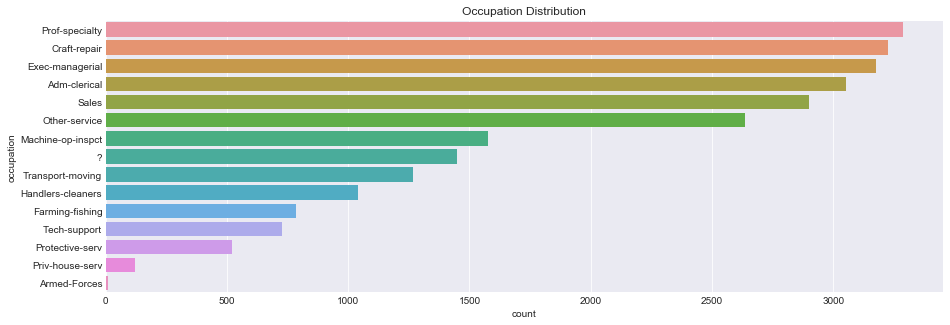

In [49]:
plt.figure(figsize=(15,5));
plt.title("Occupation Distribution")
sns.countplot(y="occupation", data=adult, order=adult.groupby("occupation").count().sort_values("age",ascending=False).index)


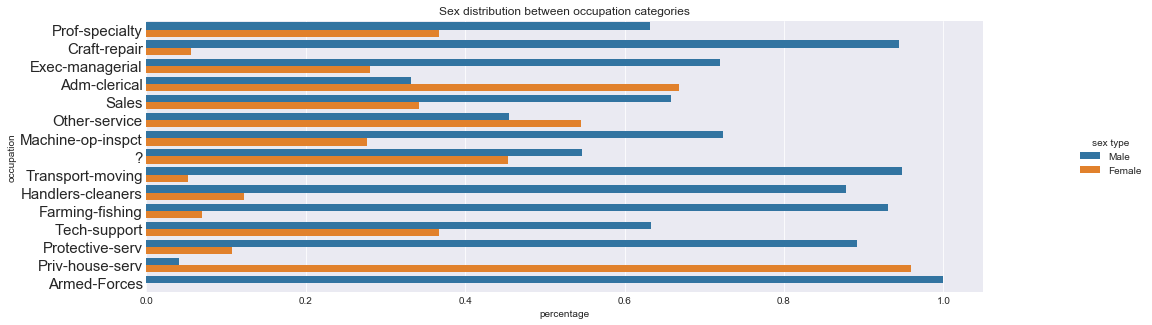

In [50]:
prop_df = (adult
           .groupby("occupation")["sex"]
           .value_counts(normalize=True)
           .rename("percentage")
           .reset_index())
plt.figure(figsize=(15,5));
plt.title("Sex distribution between occupation categories")
sns.barplot(y="occupation", x="percentage", hue="sex", data=prop_df, order=adult.groupby("occupation").count().sort_values("age",ascending=False).index);
plt.yticks(fontsize=15);
plt.legend(loc=5, bbox_to_anchor=(12/10,1/2), title="sex type");

- Mans dominate the craft-repair, farming-fishing, protective-serv occupation, transport-moving jobs, armed-forces.Even though in real life most of the population are male in these fields, for this data the skew increased the rate of the male population in these fields.
- Females dominate adm-clerical occupation, priv-house-serv.

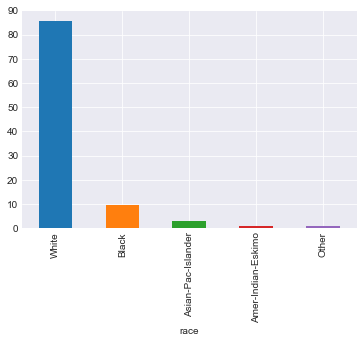

In [51]:
((adult.groupby("race")["age"].count()*100/adult["age"].count())).sort_values(ascending=False).plot(kind="bar");

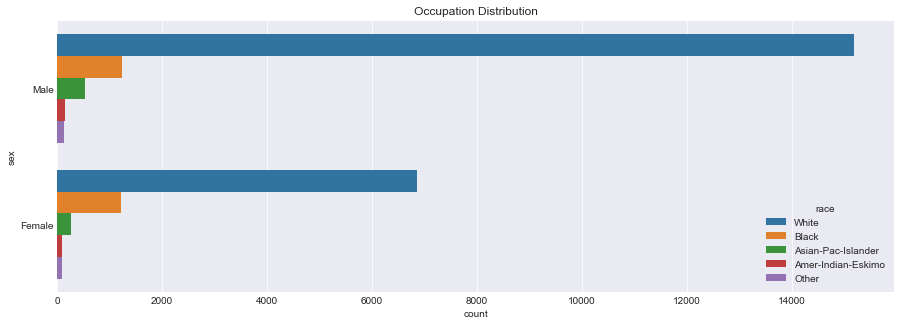

In [52]:
plt.figure(figsize=(15,5));
plt.title("Occupation Distribution")
sns.countplot(y="sex", data=adult, hue="race")


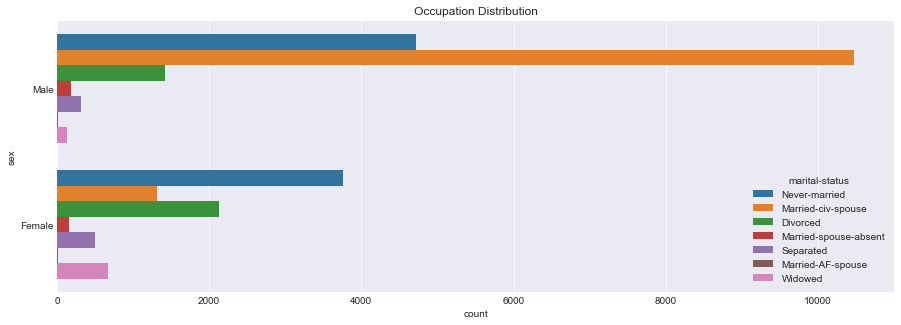

In [53]:
plt.figure(figsize=(15,5));
plt.title("Occupation Distribution")
sns.countplot(y="sex", data=adult, hue="marital-status")


- %85 of the population is white and %9 of the population is black
- Most of the male population is married.
- Most of the female population is never married.
- Divorced population is more than divorced man population even though %70 of the population is male
- Most of the man population is married with a civilian.

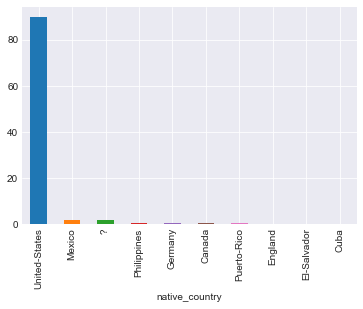

In [54]:
((adult.groupby("native_country")["age"].count()*100/adult["age"].count())).sort_values(ascending=False).iloc[0:10].plot(kind="bar");

- Nearly %85 of the population is american

In [55]:
adult["hours_per_week"].describe()

count    25775.000000
mean        40.405703
std         12.297420
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours_per_week, dtype: float64

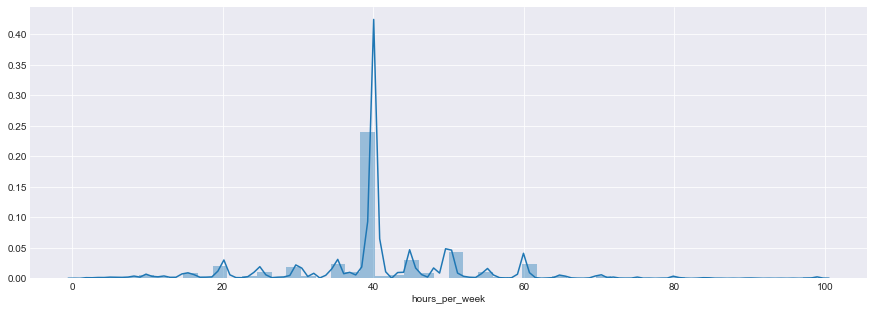

In [56]:
plt.figure(figsize=(15,5))
sns.distplot(adult["hours_per_week"])

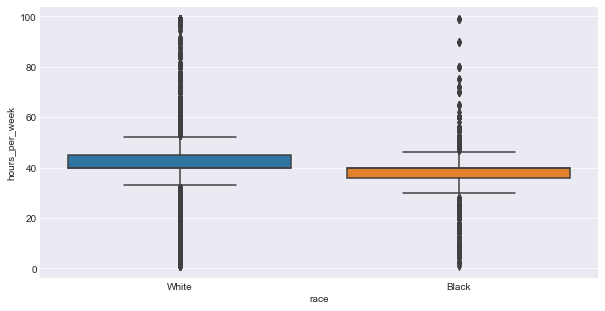

In [57]:
plt.figure(figsize=(10,5))
sns.boxplot("race", "hours_per_week", data=adult[(adult["race"] == "White") | (adult["race"] == "Black")])

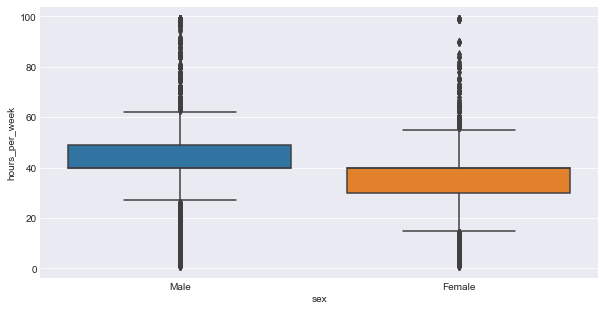

In [58]:
plt.figure(figsize=(10,5))
sns.boxplot("sex", "hours_per_week", data=adult[(adult["race"] == "White") | (adult["race"] == "Black")])

- Whites work more than blacks for this population.
- Males work more than females for this population.

In [59]:
adult["race"] = adult["race"].apply(lambda x:"Other" if x != "White" and x != "Black" else x)

In [60]:
adult["native_country"] = adult["native_country"].apply(lambda x:"Other" if x != "United-States" else x)

In [61]:
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_class
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K,Middle-aged Adult
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K,Middle-aged Adult
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K,Middle-aged Adult
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K,Middle-aged Adult
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Other,<=50K,Young Adult


In [62]:
adult.drop(["fnlwgt","education-num","capital_gain","capital_loss","age_class"],axis=1,inplace=True)

In [63]:
adult.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours_per_week,native_country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13.0,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40.0,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40.0,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40.0,Other,<=50K


In [64]:
adult = adult.apply(lambda x: [np.nan]*len(x) if any([y == "?" for y in x]) else x,axis=1).dropna()

In [65]:
for cgt in categorical:
    print(cgt)
    adult = pd.concat([adult.drop(cgt, axis=1), pd.get_dummies(adult[cgt],drop_first=True)],axis=1)

workclass
education
marital-status
occupation
relationship
race
sex
native_country
income


In [93]:
adult.head()

,age,hours_per_week,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,11th,12th,...,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Other,White,Male,United-States,>50K
0,39.0,40.0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,1,1,0
1,50.0,13.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
2,38.0,40.0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,1,0
3,53.0,40.0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
4,28.0,40.0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [94]:
X = adult.drop(">50K",axis=1)
y = adult[">50K"]

In [107]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [108]:
skfold = StratifiedKFold(n_splits=5,shuffle=True)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3, random_state=42)

In [112]:
param_grid = {"max_depth":range(1,5), "min_samples_split":range(2,6)}

In [119]:
grid_dtc = GridSearchCV(DecisionTreeClassifier(),param_grid,verbose=1,cv=skfold)

In [120]:
grid_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    2.2s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 5), 'min_samples_split': range(2, 6)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [138]:
dtc_predict = grid_dtc.best_estimator_.predict(X_test)

In [139]:
print(confusion_matrix(y_test, dtc_predict))
print()
print(classification_report(y_test, dtc_predict))

[[5111  408]
 [ 928  852]]

             precision    recall  f1-score   support

          0       0.85      0.93      0.88      5519
          1       0.68      0.48      0.56      1780

avg / total       0.80      0.82      0.81      7299



In [126]:
from sklearn.svm import SVC

In [140]:
param_grid = {"C":[0.3,1],"gamma":[0.1,0.3,0.9]}

In [143]:
grid_svc = GridSearchCV(SVC(),param_grid,verbose=5,cv=skfold,n_jobs=5)

In [144]:
grid_svc.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:  1.9min
[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:  8.5min remaining:   36.3s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:  8.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=5,
       param_grid={'C': [0.3, 1], 'gamma': [0.1, 0.3, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [147]:
grid_svc.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [145]:
svc_predict = grid_svc.best_estimator_.predict(X_test)

In [146]:
print(confusion_matrix(y_test, svc_predict))
print()
print(classification_report(y_test, svc_predict))

[[5071  448]
 [ 870  910]]

             precision    recall  f1-score   support

          0       0.85      0.92      0.88      5519
          1       0.67      0.51      0.58      1780

avg / total       0.81      0.82      0.81      7299



In [148]:
from sklearn.ensemble import RandomForestClassifier

In [186]:
param_grid = {"max_depth":range(1,5),"n_estimators":[100,300,500]}

In [157]:
grid_rfc = GridSearchCV(RandomForestClassifier(),param_grid,verbose=5,cv=skfold)

In [158]:
grid_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=1, n_estimators=100 ...................................
[CV]  max_depth=1, n_estimators=100, score=0.7513211978860834, total=   0.2s
[CV] max_depth=1, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=1, n_estimators=100, score=0.7513211978860834, total=   0.2s
[CV] max_depth=1, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  max_depth=1, n_estimators=100, score=0.7513211978860834, total=   0.2s
[CV] max_depth=1, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s


[CV]  max_depth=1, n_estimators=100, score=0.7513211978860834, total=   0.2s
[CV] max_depth=1, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.2s remaining:    0.0s


[CV]  max_depth=1, n_estimators=100, score=0.7514688601645123, total=   0.2s
[CV] max_depth=1, n_estimators=300 ...................................
[CV]  max_depth=1, n_estimators=300, score=0.7513211978860834, total=   0.7s
[CV] max_depth=1, n_estimators=300 ...................................
[CV]  max_depth=1, n_estimators=300, score=0.7513211978860834, total=   0.6s
[CV] max_depth=1, n_estimators=300 ...................................
[CV]  max_depth=1, n_estimators=300, score=0.7513211978860834, total=   0.6s
[CV] max_depth=1, n_estimators=300 ...................................
[CV]  max_depth=1, n_estimators=300, score=0.7513211978860834, total=   0.7s
[CV] max_depth=1, n_estimators=300 ...................................
[CV]  max_depth=1, n_estimators=300, score=0.7514688601645123, total=   0.6s
[CV] max_depth=1, n_estimators=500 ...................................
[CV]  max_depth=1, n_estimators=500, score=0.7513211978860834, total=   1.1s
[CV] max_depth=1, n_estimators=500 

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 5), 'n_estimators': [100, 300, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [159]:
grid_rfc.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [160]:
rfc_predict = grid_rfc.best_estimator_.predict(X_test)

In [161]:
print(confusion_matrix(y_test, rfc_predict))
print()
print(classification_report(y_test, rfc_predict))

[[5401  118]
 [1314  466]]

             precision    recall  f1-score   support

          0       0.80      0.98      0.88      5519
          1       0.80      0.26      0.39      1780

avg / total       0.80      0.80      0.76      7299



In [164]:
from sklearn.linear_model import LogisticRegression

In [165]:
param_grid = {"C":[0.1,0.3,1,3]}

In [166]:
grid_lor = GridSearchCV(LogisticRegression(),param_grid,cv=skfold,n_jobs=5,verbose=5)

In [167]:
grid_lor.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    2.8s
[Parallel(n_jobs=5)]: Done  16 out of  20 | elapsed:    3.6s remaining:    0.8s
[Parallel(n_jobs=5)]: Done  20 out of  20 | elapsed:    3.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=5,
       param_grid={'C': [0.1, 0.3, 1, 3]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=5)

In [182]:
grid_lor.best_estimator_

LogisticRegression(C=3, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [170]:
lor_predict = grid_lor.best_estimator_.predict(X_test)

In [171]:
print(confusion_matrix(y_test, lor_predict))
print()
print(classification_report(y_test, lor_predict))

[[5077  442]
 [ 801  979]]

             precision    recall  f1-score   support

          0       0.86      0.92      0.89      5519
          1       0.69      0.55      0.61      1780

avg / total       0.82      0.83      0.82      7299



In [179]:
param_grid = {"n_estimators":[100,300,500]}

In [180]:
grid_rfc_2 = GridSearchCV(RandomForestClassifier(),param_grid,verbose=5,cv=skfold)

In [181]:
grid_rfc_2.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] n_estimators=100 ................................................
[CV] ........ n_estimators=100, score=0.815619495008808, total=   1.2s
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] ....... n_estimators=100, score=0.8118027011156782, total=   1.2s
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


[CV] ........ n_estimators=100, score=0.812096300645919, total=   1.2s
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.5s remaining:    0.0s


[CV] ....... n_estimators=100, score=0.8153258954785673, total=   1.2s
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.1s remaining:    0.0s


[CV] ....... n_estimators=100, score=0.8031727379553466, total=   1.2s
[CV] n_estimators=300 ................................................
[CV] ........ n_estimators=300, score=0.813270698766882, total=   3.5s
[CV] n_estimators=300 ................................................
[CV] ....... n_estimators=300, score=0.8126834997064005, total=   3.8s
[CV] n_estimators=300 ................................................
[CV] ....... n_estimators=300, score=0.8094539048737522, total=   3.5s
[CV] n_estimators=300 ................................................
[CV] ....... n_estimators=300, score=0.8194362889019378, total=   3.5s
[CV] n_estimators=300 ................................................
[CV] ....... n_estimators=300, score=0.8069917743830788, total=   3.6s
[CV] n_estimators=500 ................................................
[CV] ........ n_estimators=500, score=0.817968291250734, total=   6.0s
[CV] n_estimators=500 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 300, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [183]:
grid_rfc_2.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [184]:
rfc2_predict = grid_rfc_2.best_estimator_.predict(X_test)

In [185]:
print(confusion_matrix(y_test, rfc2_predict))
print()
print(classification_report(y_test, rfc2_predict))

[[4917  602]
 [ 774 1006]]

             precision    recall  f1-score   support

          0       0.86      0.89      0.88      5519
          1       0.63      0.57      0.59      1780

avg / total       0.81      0.81      0.81      7299



- Logistic regression and RandomForest are better i think because they can classify class 1 better even though class 1 is %30 of the population.